[*********************100%%**********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f3ffkpd/d771nvgy.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f3ffkpd/lhkf3q9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79171', 'data', 'file=/tmp/tmp6f3ffkpd/d771nvgy.json', 'init=/tmp/tmp6f3ffkpd/lhkf3q9o.json', 'output', 'file=/tmp/tmp6f3ffkpd/prophet_model6sytcd93/prophet_model-20231025024455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:44:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:45:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


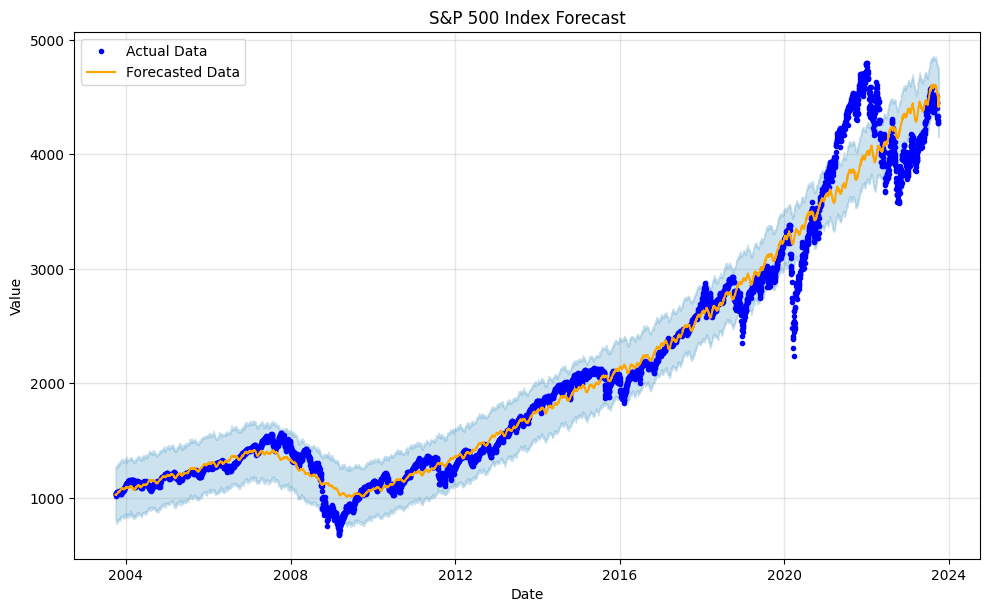

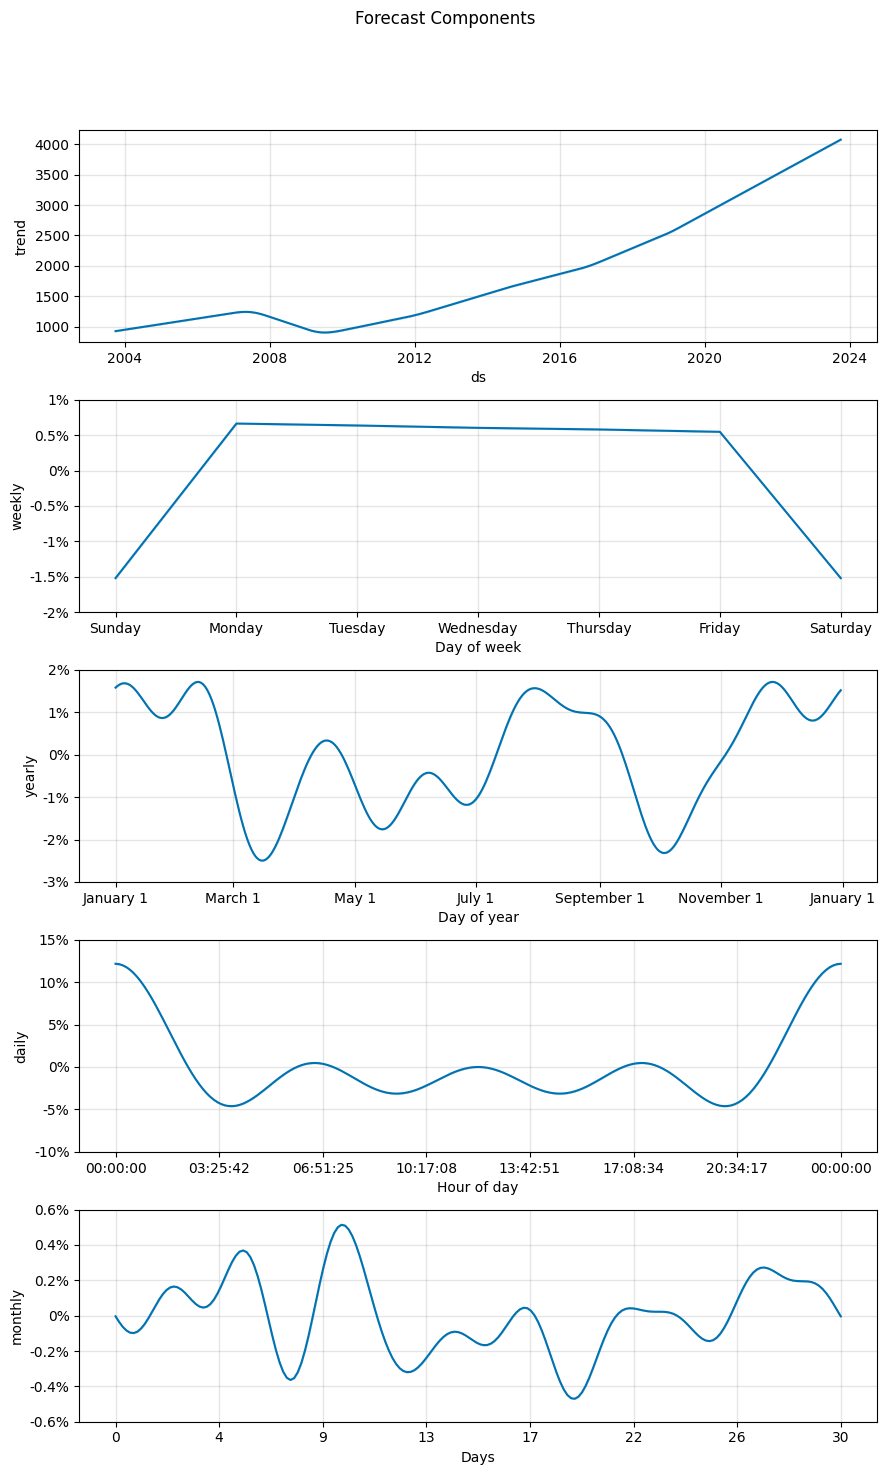

INFO:prophet:Making 6 forecasts with cutoffs between 2013-09-28 00:00:00 and 2023-09-26 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f3ffkpd/8klwru67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f3ffkpd/fy2rff5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59382', 'data', 'file=/tmp/tmp6f3ffkpd/8klwru67.json', 'init=/tmp/tmp6f3ffkpd/fy2rff5b.json', 'output', 'file=/tmp/tmp6f3ffkpd/prophet_model1lhd8mtn/prophet_model-20231025024503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:45:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:45:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f3ffkpd/l1fjt6ry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6f3ffkpd/i71x85ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

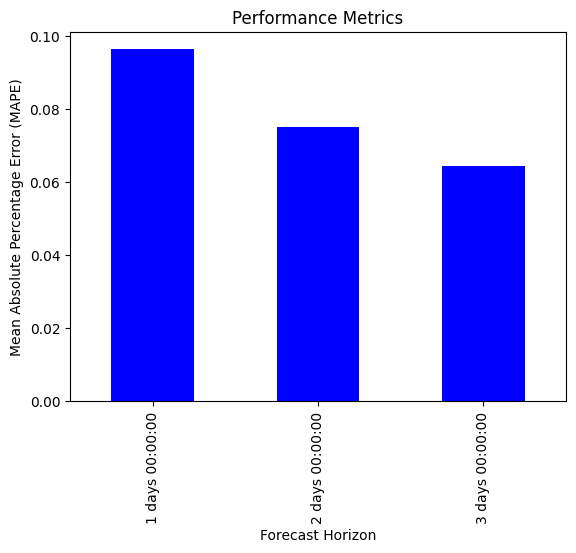

  horizon            mse        rmse         mae      mape     mdape  \
0  1 days  106128.506047  325.773704  299.030103  0.096431  0.091982   
1  2 days   64537.183902  254.041697  223.180187  0.075063  0.072826   
2  3 days   60516.288814  246.000587  198.213567  0.064530  0.053110   

      smape  coverage  
0  0.095927      0.25  
1  0.074899      0.40  
2  0.063962      0.60  


In [22]:
!pip install yfinance
!pip install prophet
!pip install pystan

# Import necessary libraries
from prophet import Prophet
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet.diagnostics import performance_metrics, cross_validation
from prophet.plot import plot_plotly, plot_components_plotly


# Download SPX ticker data
ticker="^SPX"
data = yf.download(ticker, start="2003-10-01", end="2023-10-01")

# Prepare the data for Prophet model
df = pd.DataFrame()
df["ds"] = data.index
df["y"] = data["Adj Close"].values
df.dropna(inplace=True)

# Create and train Prophet model
model = Prophet(
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.01,
    n_changepoints=300,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    growth="linear",
    holidays=None,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=10
    )


# Fit the model to the data
model.fit(df)

# Create a dataframe for making future predictions
future = model.make_future_dataframe(periods=5)  # Extend the time frame by 5 days

# Predict future values
forecast = model.predict(future)


# Plot the forecast
fig = model.plot(forecast)
plt.title("S&P 500 Index Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
fig.gca().get_lines()[0].set_color("blue")  # Actual data (blue)
fig.gca().get_lines()[1].set_color("orange")  # Forecasted data (orange)
plt.legend(["Actual Data", "Forecasted Data"], loc="upper left")
plt.show()

# Access prediction components (trend, seasonality, holidays)
forecast_components = model.plot_components(forecast)
plt.suptitle("Forecast Components")
plt.subplots_adjust(top=0.9)  # Adjust the top margin for the title
plt.show()

# Calculate and display performance metrics (e.g., RMSE, MAE)
df_cv = cross_validation(model, horizon='3 days', period='730 days', initial='3650 days')
performance = performance_metrics(df_cv)

# Create a bar plot for performance metrics
performance.plot(x='horizon', y='mape', kind='bar', color='b', legend=False)
plt.title("Performance Metrics")
plt.xlabel("Forecast Horizon")
plt.ylabel("Mean Absolute Percentage Error (MAPE)")
plt.show()

print(performance)